In [1]:
#conda install -c conda-forge/label/gcc7 missingno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import missingno as msno

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import missingno as msno

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [4]:
df = pd.read_csv('train.csv')
df.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [5]:
df.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [6]:
families=df.family.unique()
list(families)

['AUTOMOTIVE',
 'BABY CARE',
 'BEAUTY',
 'BEVERAGES',
 'BOOKS',
 'BREAD/BAKERY',
 'CELEBRATION',
 'CLEANING',
 'DAIRY',
 'DELI',
 'EGGS',
 'FROZEN FOODS',
 'GROCERY I',
 'GROCERY II',
 'HARDWARE',
 'HOME AND KITCHEN I',
 'HOME AND KITCHEN II',
 'HOME APPLIANCES',
 'HOME CARE',
 'LADIESWEAR',
 'LAWN AND GARDEN',
 'LINGERIE',
 'LIQUOR,WINE,BEER',
 'MAGAZINES',
 'MEATS',
 'PERSONAL CARE',
 'PET SUPPLIES',
 'PLAYERS AND ELECTRONICS',
 'POULTRY',
 'PREPARED FOODS',
 'PRODUCE',
 'SCHOOL AND OFFICE SUPPLIES',
 'SEAFOOD']

In [7]:
len(families)

33

In [8]:
stores=df.store_nbr.unique()
list(stores)
stores.sort()
stores

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [59]:
df_1_auto=df.loc[(df.store_nbr==1)&(df.family=='AUTOMOTIVE')]
df_1_auto.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0
3564,3564,2013-01-03,1,AUTOMOTIVE,3.0,0
5346,5346,2013-01-04,1,AUTOMOTIVE,3.0,0
7128,7128,2013-01-05,1,AUTOMOTIVE,5.0,0
8910,8910,2013-01-06,1,AUTOMOTIVE,2.0,0
10692,10692,2013-01-07,1,AUTOMOTIVE,0.0,0
12474,12474,2013-01-08,1,AUTOMOTIVE,2.0,0
14256,14256,2013-01-09,1,AUTOMOTIVE,2.0,0
16038,16038,2013-01-10,1,AUTOMOTIVE,2.0,0


In [60]:
print(df_1_auto.shape)

(1684, 6)


In [10]:
pd.to_datetime(df_1_auto.date, format='%Y/%m/%d')
df_1_auto.set_index('date', inplace=True)
df_1_auto.index=pd.DatetimeIndex(df_1_auto.index)

In [11]:
df_1_auto.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=1684, freq=None)

<AxesSubplot:xlabel='date'>

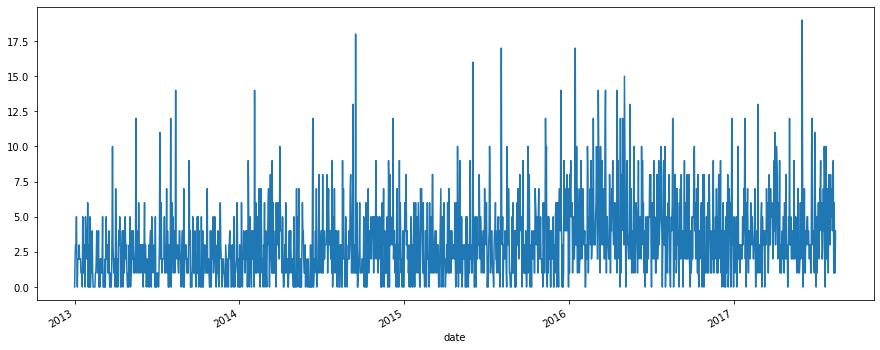

In [12]:
df_1_auto.sales.plot(figsize=(15, 6))

<AxesSubplot:xlabel='date'>

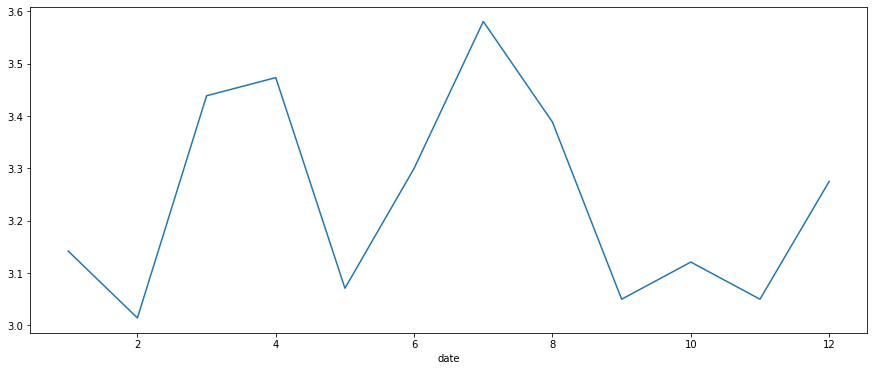

In [13]:
df_1_auto.sales.groupby(df_1_auto.index.month).mean().plot(figsize=(15, 6))

<AxesSubplot:xlabel='date'>

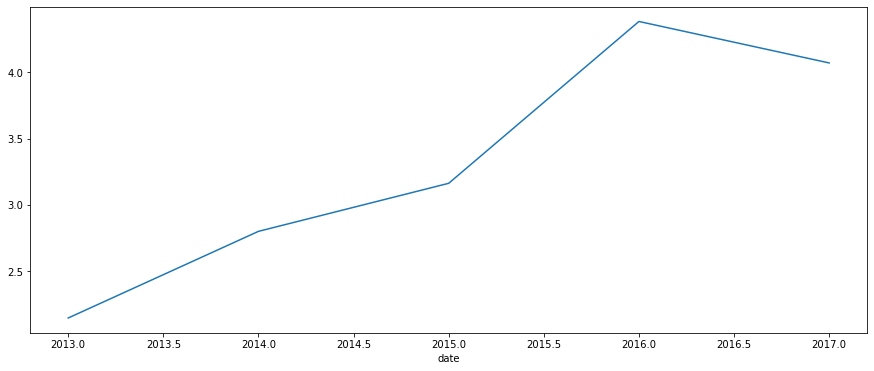

In [14]:
df_1_auto.sales.groupby(df_1_auto.index.year).mean().plot(figsize=(15, 6))

<AxesSubplot:xlabel='date'>

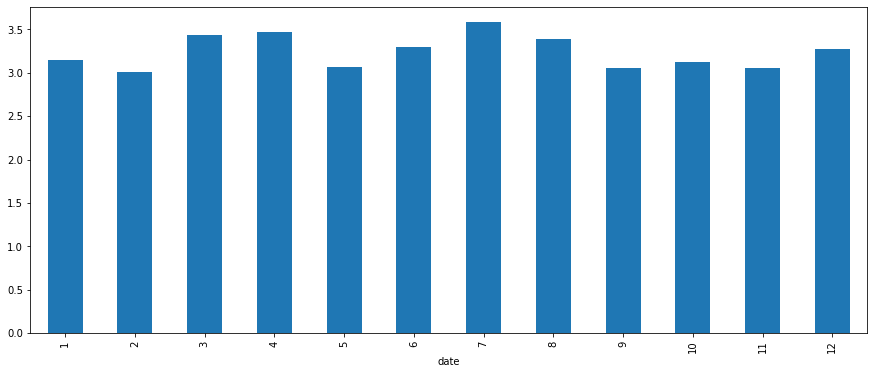

In [15]:
df_1_auto.sales.groupby(df_1_auto.index.month).mean().plot(figsize=(15, 6), kind='bar')

In [24]:
#Defining two-thirds of the data for training and one-third for testing:
train=df_1_auto[:int(2/3*df_1_auto.shape[0])]
test=df_1_auto[int(2/3*df_1_auto.shape[0]+1):]

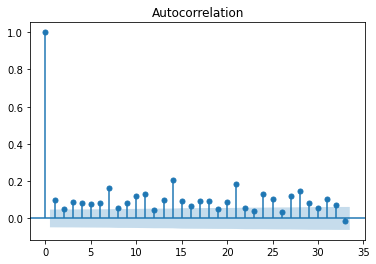

In [25]:
# Visualizing autocorrelations:
plot_acf(df_1_auto.sales)
plt.show()

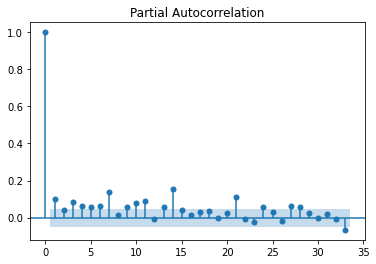

In [26]:
#partial autocorrelation
plot_pacf(df_1_auto.sales)
plt.show()

In [ ]:
#AUTO REGRESSION

In [16]:
#Creating an autoregression model:
auto_reg=AutoReg(df_1_auto.sales, lags=[1, 7, 14, 21]).fit()

C:\Users\nithi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nithi\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [17]:
# Checking parameters:
auto_reg.params

intercept    1.774706
sales.L1     0.062200
sales.L7     0.101905
sales.L14    0.161844
sales.L21    0.133720
dtype: float64

In [27]:
# Predictions from the training dataset itself:
preds_auto_reg = auto_reg.params[0]+auto_reg.params[1]*train.sales.shift(7)+auto_reg.params[2]*train.sales.shift(14)+auto_reg.params[3]*train.sales.shift(21)

In [28]:
preds_auto_reg

date
2013-01-01         NaN
2013-01-02         NaN
2013-01-03         NaN
2013-01-04         NaN
2013-01-05         NaN
                ...   
2016-01-26    4.039139
2016-01-27    3.683911
2016-01-28    2.849935
2016-01-29    3.528851
2016-01-30    4.789156
Name: sales, Length: 1122, dtype: float64

<AxesSubplot:xlabel='date'>

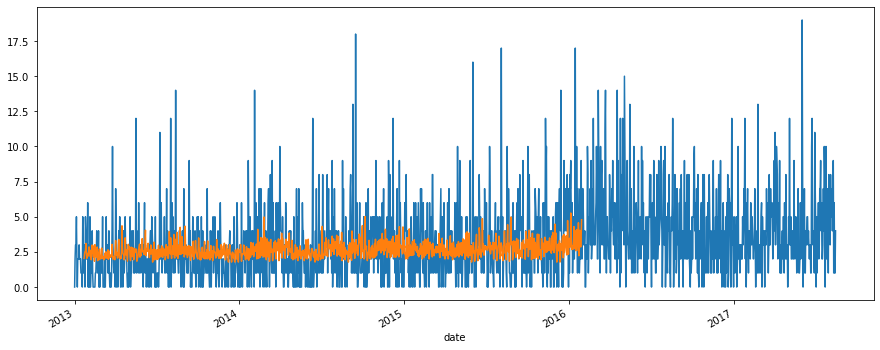

In [29]:
#Comparing model with real data:
df_1_auto.sales.plot(figsize=(15, 6))
preds_auto_reg.plot(figsize=(15, 6))

In [30]:
#Predicting from the test dataset:
preds_auto_reg=auto_reg.params[0]+auto_reg.params[1]*test.sales.shift(7)+auto_reg.params[2]*test.sales.shift(14)+auto_reg.params[3]*test.sales.shift(21)

In [31]:
preds_auto_reg

date
2016-02-01         NaN
2016-02-02         NaN
2016-02-03         NaN
2016-02-04         NaN
2016-02-05         NaN
                ...   
2017-08-11    4.604080
2017-08-12    3.788077
2017-08-13    2.249813
2017-08-14    3.672723
2017-08-15    4.151469
Name: sales, Length: 561, dtype: float64

<AxesSubplot:xlabel='date'>

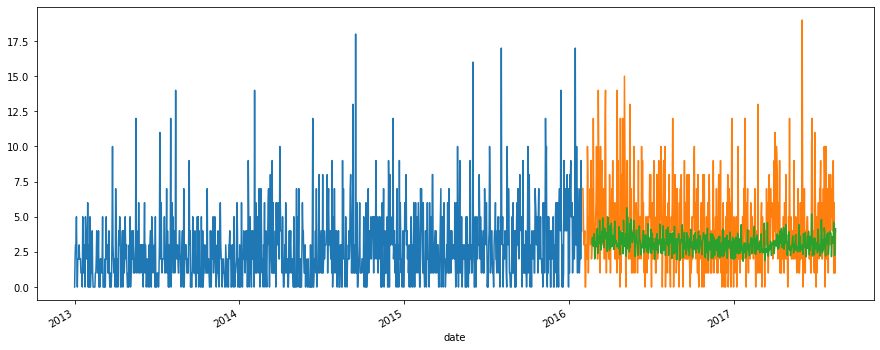

In [32]:
#Vizualization:
train.sales.plot(figsize=(15, 6))
test.sales.plot(figsize=(15, 6))
preds_auto_reg.plot(figsize=(15, 6))

In [33]:
auto_reg_SME = ((test.sales - preds_auto_reg)**2).mean()

In [35]:
auto_reg_SME

9.674407948636217

In [ ]:
#ARMA

In [37]:
arma=ARIMA(train.sales, order=(1, 0, 1)).fit()

C:\Users\nithi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nithi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nithi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [38]:
arma.params

const     2.916129
ar.L1     0.998390
ma.L1    -0.981861
sigma2    6.172770
dtype: float64

In [39]:
arma.predict()

date
2013-01-01    2.916129
2013-01-02    2.643872
2013-01-03    2.589321
2013-01-04    2.622177
2013-01-05    2.650245
                ...   
2016-01-26    4.008713
2016-01-27    3.973753
2016-01-28    4.022069
2016-01-29    3.986867
2016-01-30    4.068002
Name: predicted_mean, Length: 1122, dtype: float64

<AxesSubplot:xlabel='date'>

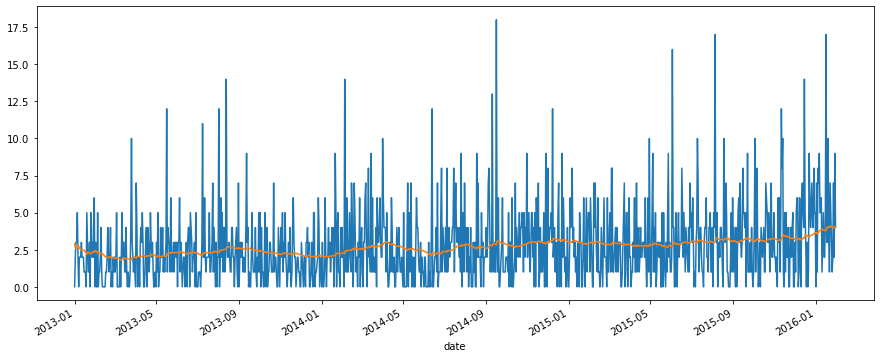

In [40]:
#Comparing model with real data:
train.sales.plot(figsize=(15, 6))
arma.predict().plot()

In [41]:
# Predictions for test dataset:
preds_arma=arma.predict(start=train.shape[0]+1, end=train.shape[0]+test.shape[0])

C:\Users\nithi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [42]:
preds_arma.index=test.index
preds_arma

date
2016-02-01    4.063174
2016-02-02    4.061327
2016-02-03    4.059482
2016-02-04    4.057641
2016-02-05    4.055803
                ...   
2017-08-11    3.384333
2017-08-12    3.383579
2017-08-13    3.382827
2017-08-14    3.382075
2017-08-15    3.381325
Name: predicted_mean, Length: 561, dtype: float64

<AxesSubplot:xlabel='date'>

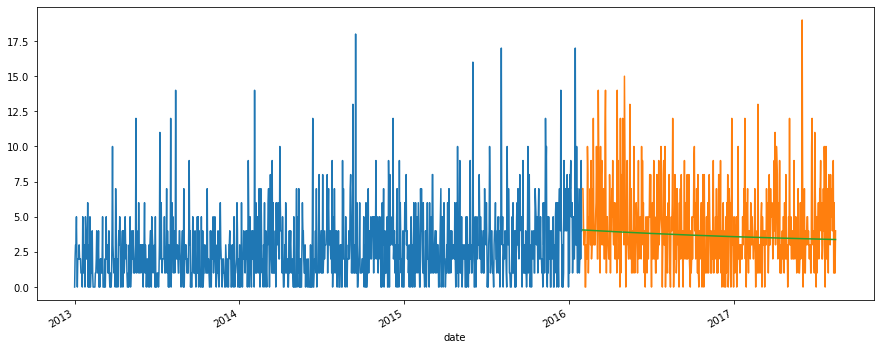

In [43]:
#visualization
train.sales.plot(figsize=(15, 6))
test.sales.plot(figsize=(15, 6))
preds_arma.plot(figsize=(15, 6))

In [ ]:
#The model manages to capture the trend (decline in the number of sales from 2016 onwards), but not the variability.

In [44]:
arma_1_auto_SME=((test.sales - preds_arma)**2).mean()
arma_1_auto_SME

8.863100981166536

In [ ]:
#ARIMA

In [45]:
arima=ARIMA(train.sales, order=([1, 7, 14, 21], 1, 1)).fit()

C:\Users\nithi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nithi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nithi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nithi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge.

In [46]:
arima.params

ar.L1     0.025783
ar.L7     0.043103
ar.L14    0.058191
ar.L21    0.084666
ma.L1    -0.745815
sigma2    7.657510
dtype: float64

In [47]:
# Predictions from the training dataset itself:
arima.predict(typ='levels')
#Where "type='levels'" corrects the predicted values ​​by "reversing" the differentiation

date
2013-01-01    0.000000
2013-01-02    0.000000
2013-01-03    1.069854
2013-01-04    1.816339
2013-01-05    2.189175
                ...   
2016-01-26    4.038506
2016-01-27    3.282271
2016-01-28    3.888203
2016-01-29    3.712528
2016-01-30    5.933757
Name: predicted_mean, Length: 1122, dtype: float64

<AxesSubplot:xlabel='date'>

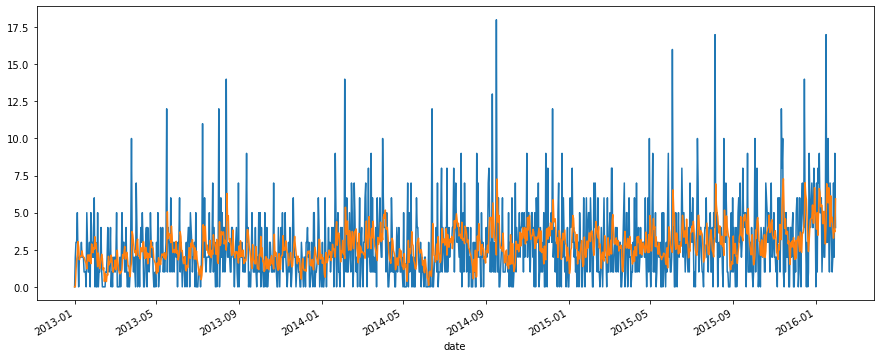

In [49]:
#Comparing model with real data:
train.sales.plot(figsize=(15, 6))
arima.predict(typ='levels').plot()

In [50]:
# Predictions for test dataset:
preds_arima=arima.predict(start=train.shape[0]+1, end=train.shape[0]+test.shape[0], typ='levels')

C:\Users\nithi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [51]:
preds_arima.index=test.index
preds_arima

date
2016-02-01    4.071942
2016-02-02    4.693851
2016-02-03    4.322258
2016-02-04    3.922587
2016-02-05    4.817150
                ...   
2017-08-11    4.436901
2017-08-12    4.436901
2017-08-13    4.436901
2017-08-14    4.436901
2017-08-15    4.436901
Name: predicted_mean, Length: 561, dtype: float64

<AxesSubplot:xlabel='date'>

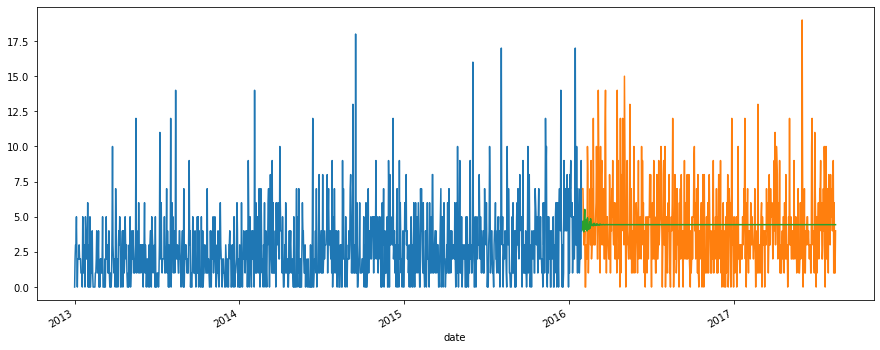

In [52]:
#Visualization:
train.sales.plot(figsize=(15, 6))
test.sales.plot(figsize=(15, 6))
preds_arima.plot(figsize=(15, 6))

In [ ]:
#The model cannot make good predictions for very distant times (high error propagation).

In [53]:
# Calculating mean squared error:
arima_SME=((test.sales - preds_arima)**2).mean()
arima_SME

8.63200632680653